# Project Proposal 

#### Team Members: Sequoia Sirek, Luci Stahlbaum, Hajar Bendada, Ruijing Hong 

## Female Post-Secondary Education Over Time

In [1]:
import pandas as pd                 # load pandas and shorten it to pd
import datetime as dt               # load datetime and shorten it to dt
import matplotlib.pyplot as plt     # for making figures
import seaborn as sns
import numpy as np
import statsmodels.api as sm           # provides statistical models like ols, gmm, anova, etc...
import statsmodels.formula.api as smf  # provides a way to directly spec models from formulas

In [2]:
#set the header (make sure to keep both rows)
degree_completion_by_sex= pd.read_excel('project_deg_by_sex.xlsx', header=[1, 2], na_values='---') 
degree_completion_by_sex

Year Associate's degrees  \
                                                 Year               Total   
0                                                   1                 2.0   
1                                             1869-70                 NaN   
2                                             1879-80                 NaN   
3                                             1889-90                 NaN   
4                                           1899-1900                 NaN   
..                                                ...                 ...   
66  \1\Includes Ph.D., Ed.D., and comparable degre...                 NaN   
67  \2\Includes some degrees classified as master'...                 NaN   
68                                      \3\Projected.                 NaN   
69  NOTE: Data in this table represent the 50 stat...                 NaN   
70  SOURCE: U.S. Department of Education, National...                 NaN   

                                Bachelor's degrees                           \
   Males Females Percent female              Total Total.1    Males Males.1   
0    3.0     4.0            5.0                6.0       6      7.0       7   
1    NaN     NaN            NaN             9371.0     \2\   7993.0     \2\   
2    NaN     NaN            NaN            12896.0     \2\  10411.0     \2\   
3    NaN     NaN            NaN            15539.0     \2\  12857.0     \2\   
4    NaN     NaN            NaN            27410.0     \2\  22173.0     \2\   
..   ...     ...            ...                ...     ...      ...     ...   
66   NaN     NaN            NaN                NaN     NaN      NaN     NaN   
67   NaN     NaN            NaN                NaN     NaN      NaN     NaN   
68   NaN     NaN            NaN                NaN     NaN      NaN     NaN   
69   NaN     NaN            NaN                NaN     NaN      NaN     NaN   
70   NaN     NaN            NaN                NaN     NaN      NaN     NaN   

                                    Master's degrees                  \
   Females Females.1 Percent female            Total   Males Females   
0      8.0         8       9.000000             10.0    11.0    12.0   
1   1378.0       \2\      14.704941              0.0     0.0     0.0   
2   2485.0       \2\      19.269541            879.0   868.0    11.0   
3   2682.0       \2\      17.259798           1015.0   821.0   194.0   
4   5237.0       \2\      19.106166           1583.0  1280.0   303.0   
..     ...       ...            ...              ...     ...     ...   
66     NaN       NaN            NaN              NaN     NaN     NaN   
67     NaN       NaN            NaN              NaN     NaN     NaN   
68     NaN       NaN            NaN              NaN     NaN     NaN   
69     NaN       NaN            NaN              NaN     NaN     NaN   
70     NaN       NaN            NaN              NaN     NaN     NaN   

                  Doctor's degrees\1\                                
   Percent female               Total  Males Females Percent female  
0       13.000000                14.0   15.0    16.0      17.000000  
1             NaN                 1.0    1.0     0.0       0.000000  
2        1.251422                54.0   51.0     3.0       5.555556  
3       19.113300               149.0  147.0     2.0       1.342282  
4       19.140872               382.0  359.0    23.0       6.020942  
..            ...                 ...    ...     ...            ...  
66            NaN                 NaN    NaN     NaN            NaN  
67            NaN                 NaN    NaN     NaN            NaN  
68            NaN                 NaN    NaN     NaN            NaN  
69            NaN                 NaN    NaN     NaN            NaN  
70            NaN                 NaN    NaN     NaN            NaN  

[71 rows x 20 columns]

In [3]:
#I noticed that row 66 on has more descriptive information so 
#I will remove that 

#The last few rows of data are predictions so I will remove those also 
#These are the rows with \3\

degree_completion_by_sex= pd.read_excel('project_deg_by_sex.xlsx', header=[1,2], skipfooter=17, na_values='---')
degree_completion_by_sex.tail(5)

Year Associate's degrees                                     \
       Year               Total     Males   Females Percent female   
49  2016-17           1005687.0  394147.0  611540.0      60.808184   
50  2017-18           1011696.0  398692.0  613004.0      60.591719   
51  2018-19           1036640.0  407219.0  629443.0      60.718248   
52  2019-20           1019038.0  393383.0  625655.0      61.396631   
53  2020-21           1036431.0  383029.0  653402.0      63.043464   

   Bachelor's degrees                                             \
                Total Total.1   Males Males.1  Females Females.1   
49            1956114     NaN  836021     NaN  1120093       NaN   
50            1980665     NaN  844979     NaN  1135686       NaN   
51            2013086     NaN  857607     NaN  1155479       NaN   
52            2038682     NaN  861384     NaN  1177298       NaN   
53            2066445     NaN  860764     NaN  1205681       NaN   

                  Master's degrees                                 \
   Percent female            Total   Males Females Percent female   
49      57.261131           804542  326857  477685      59.373532   
50      57.338621           820242  326907  493335      60.145055   
51      57.396562           833792  326201  507591      60.875177   
52      57.747996           843531  325711  517820      61.387193   
53      58.345661           866894  330700  536194      61.852314   

   Doctor's degrees\1\                                
                 Total  Males Females Percent female  
49              181357  84649   96708      53.324658  
50              183734  85389   98345      53.525749  
51              187577  85771  101806      54.273117  
52              190133  85220  104913      55.178743  
53              194059  85367  108692      56.009770

In [4]:
#Get rid of row zero and keep all other rows 
degree_completion_by_sex = degree_completion_by_sex[degree_completion_by_sex.index != 0]

In [5]:
degree_completion_by_sex.head(3)

Year Associate's degrees                               \
      Year               Total Males Females Percent female   
1  1869-70                 NaN   NaN     NaN            NaN   
2  1879-80                 NaN   NaN     NaN            NaN   
3  1889-90                 NaN   NaN     NaN            NaN   

  Bachelor's degrees                                                          \
               Total Total.1  Males Males.1 Females Females.1 Percent female   
1               9371     \2\   7993     \2\    1378       \2\      14.704941   
2              12896     \2\  10411     \2\    2485       \2\      19.269541   
3              15539     \2\  12857     \2\    2682       \2\      17.259798   

  Master's degrees                              Doctor's degrees\1\        \
             Total Males Females Percent female               Total Males   
1                0     0       0            NaN                   1     1   
2              879   868      11       1.251422                  54    51   
3             1015   821     194      19.113300                 149   147   

                          
  Females Percent female  
1       0       0.000000  
2       3       5.555556  
3       2       1.342282

In [6]:
#Get rid of extra year after dash (-xxxx) and just keep initial 
#year the data was taken over 
for i in range(1, degree_completion_by_sex.shape[0]):
    end_index = degree_completion_by_sex[('Year', 'Year')][i].rfind('-')
    degree_completion_by_sex[('Year', 'Year')][i] = degree_completion_by_sex[('Year', 'Year')][i][:end_index]

degree_completion_by_sex.head()

C:\Users\local_rhong22\Temp\2\ipykernel_48376\1794685350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  degree_completion_by_sex[('Year', 'Year')][i] = degree_completion_by_sex[('Year', 'Year')][i][:end_index]
C:\Users\local_rhong22\Temp\2\ipykernel_48376\1794685350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  degree_completion_by_sex[('Year', 'Year')][i] = degree_completion_by_sex[('Year', 'Year')][i][:end_index]
C:\Users\local_rhong22\Temp\2\ipykernel_48376\1794685350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

Year Associate's degrees                              Bachelor's degrees  \
   Year               Total Males Females Percent female              Total   
1  1869                 NaN   NaN     NaN            NaN               9371   
2  1879                 NaN   NaN     NaN            NaN              12896   
3  1889                 NaN   NaN     NaN            NaN              15539   
4  1899                 NaN   NaN     NaN            NaN              27410   
5  1909                 NaN   NaN     NaN            NaN              37199   

                                                          Master's degrees  \
  Total.1  Males Males.1 Females Females.1 Percent female            Total   
1     \2\   7993     \2\    1378       \2\      14.704941                0   
2     \2\  10411     \2\    2485       \2\      19.269541              879   
3     \2\  12857     \2\    2682       \2\      17.259798             1015   
4     \2\  22173     \2\    5237       \2\      19.106166             1583   
5     \2\  28762     \2\    8437       \2\      22.680717             2113   

                               Doctor's degrees\1\                \
  Males Females Percent female               Total Males Females   
1     0       0            NaN                   1     1       0   
2   868      11       1.251422                  54    51       3   
3   821     194      19.113300                 149   147       2   
4  1280     303      19.140872                 382   359      23   
5  1555     558      26.407951                 443   399      44   

                  
  Percent female  
1       0.000000  
2       5.555556  
3       1.342282  
4       6.020942  
5       9.932280

In [7]:
#Sets year as the index 
degree_completion_by_sex.set_index(('Year', 'Year'), inplace = True)
degree_completion_by_sex.head()


Associate's degrees                               \
                           Total Males Females Percent female   
(Year, Year)                                                    
1869                         NaN   NaN     NaN            NaN   
1879                         NaN   NaN     NaN            NaN   
1889                         NaN   NaN     NaN            NaN   
1899                         NaN   NaN     NaN            NaN   
1909                         NaN   NaN     NaN            NaN   

             Bachelor's degrees                                           \
                          Total Total.1  Males Males.1 Females Females.1   
(Year, Year)                                                               
1869                       9371     \2\   7993     \2\    1378       \2\   
1879                      12896     \2\  10411     \2\    2485       \2\   
1889                      15539     \2\  12857     \2\    2682       \2\   
1899                      27410     \2\  22173     \2\    5237       \2\   
1909                      37199     \2\  28762     \2\    8437       \2\   

                            Master's degrees                               \
             Percent female            Total Males Females Percent female   
(Year, Year)                                                                
1869              14.704941                0     0       0            NaN   
1879              19.269541              879   868      11       1.251422   
1889              17.259798             1015   821     194      19.113300   
1899              19.106166             1583  1280     303      19.140872   
1909              22.680717             2113  1555     558      26.407951   

             Doctor's degrees\1\                               
                           Total Males Females Percent female  
(Year, Year)                                                   
1869                           1     1       0       0.000000  
1879                          54    51       3       5.555556  
1889                         149   147       2       1.342282  
1899                         382   359      23       6.020942  
1909                         443   399      44       9.932280

In [8]:
degree_completion_by_sex.index

Index(['1869', '1879', '1889', '1899', '1909', '1919', '1929', '1939', '1949',
       '1959', '1969', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020-21'],
      dtype='object', name=('Year', 'Year'))

In [9]:
print(degree_completion_by_sex.columns)

MultiIndex([('Associate's degrees',          'Total'),
            ('Associate's degrees',          'Males'),
            ('Associate's degrees',        'Females'),
            ('Associate's degrees', 'Percent female'),
            ( 'Bachelor's degrees',          'Total'),
            ( 'Bachelor's degrees',        'Total.1'),
            ( 'Bachelor's degrees',          'Males'),
            ( 'Bachelor's degrees',        'Males.1'),
            ( 'Bachelor's degrees',        'Females'),
            ( 'Bachelor's degrees',      'Females.1'),
            ( 'Bachelor's degrees', 'Percent female'),
            (   'Master's degrees',          'Total'),
            (   'Master's degrees',          'Males'),
            (   'Master's degrees',        'Females'),
            (   'Master's degrees', 'Percent female'),
            ('Doctor's degrees\1\',          'Total'),
            ('Doctor's degrees\1\',          'Males'),
            ('Doctor's degrees\1\',        'Females'),
          

In [10]:
degree_completion_by_sex.rename(columns={"Total.1":'first_no'}, inplace=True)
degree_completion_by_sex.rename(columns={"Males.1":'second_no'}, inplace=True)
degree_completion_by_sex.rename(columns={"Females.1":'third_no'}, inplace=True)

degree_completion_by_sex.rename(columns={"Associate's degrees":'Associate'}, inplace=True)
degree_completion_by_sex.rename(columns={"Bachelor's degrees":'Bachelor'}, inplace=True)
degree_completion_by_sex.rename(columns={"Master's degrees":'Master'}, inplace=True)
degree_completion_by_sex.rename(columns={"Doctor's degrees\\1\\":'Doctor'}, inplace=True)

degree_completion_by_sex

Associate                                    Bachelor           \
                  Total     Males   Females Percent female    Total first_no   
(Year, Year)                                                                   
1869                NaN       NaN       NaN            NaN     9371      \2\   
1879                NaN       NaN       NaN            NaN    12896      \2\   
1889                NaN       NaN       NaN            NaN    15539      \2\   
1899                NaN       NaN       NaN            NaN    27410      \2\   
1909                NaN       NaN       NaN            NaN    37199      \2\   
1919                NaN       NaN       NaN            NaN    48622      \2\   
1929                NaN       NaN       NaN            NaN   122484      \2\   
1939                NaN       NaN       NaN            NaN   186500      \2\   
1949                NaN       NaN       NaN            NaN   432058      \2\   
1959                NaN       NaN       NaN            NaN   392440      \2\   
1969           206023.0  117432.0   88591.0      43.000539   792316      NaN   
1979           400910.0  183737.0  217173.0      54.170013   929417      NaN   
1980           416377.0  188638.0  227739.0      54.695384   935140      NaN   
1981           434526.0  196944.0  237582.0      54.676130   952998      NaN   
1982           449620.0  203991.0  245629.0      54.630355   969510      NaN   
1983           452240.0  202704.0  249536.0      55.177782   974309      NaN   
1984           454712.0  202932.0  251780.0      55.371312   979477      NaN   
1985           446047.0  196166.0  249881.0      56.021226   987823      NaN   
1986           436304.0  190839.0  245465.0      56.260085   991264      NaN   
1987           435085.0  190047.0  245038.0      56.319570   994829      NaN   
1988           436764.0  186316.0  250448.0      57.341722  1018755      NaN   
1989           455102.0  191195.0  263907.0      57.988539  1051344      NaN   
1990           481720.0  198634.0  283086.0      58.765673  1094538      NaN   
1991           504231.0  207481.0  296750.0      58.851994  1136553      NaN   
1992           514756.0  211964.0  302792.0      58.822432  1165178      NaN   
1993           530632.0  215261.0  315371.0      59.433091  1169275      NaN   
1994           539691.0  218352.0  321339.0      59.541293  1160134      NaN   
1995           555216.0  219514.0  335702.0      60.463315  1164792      NaN   
1996           571226.0  223948.0  347278.0      60.795202  1172879      NaN   
1997           558555.0  217613.0  340942.0      61.040005  1184406      NaN   
1998           564984.0  220508.0  344476.0      60.970930  1202239      NaN   
1999           564933.0  224721.0  340212.0      60.221655  1237875      NaN   
2000           578865.0  231645.0  347220.0      59.982898  1244171      NaN   
2001           595133.0  238109.0  357024.0      59.990624  1291900      NaN   
2002           634016.0  253451.0  380565.0      60.024510  1348811      NaN   
2003           665945.0  260400.0  405545.0      60.897672  1399760      NaN   
2004           697086.0  267759.0  429327.0      61.588814  1439848      NaN   
2005           713315.0  270139.0  443176.0      62.129073  1485104      NaN   
2006           727616.0  275034.0  452582.0      62.200666  1524729      NaN   
2007           750166.0  282695.0  467471.0      62.315674  1563734      NaN   
2008           787243.0  298066.0  489177.0      62.137993  1601399      NaN   
2009           848856.0  322747.0  526109.0      61.978592  1649919      NaN   
2010           943506.0  361408.0  582098.0      61.695209  1716053      NaN   
2011          1021718.0  393479.0  628239.0      61.488493  1792163      NaN   
2012          1007427.0  389195.0  618232.0      61.367424  1840381      NaN   
2013          1005155.0  391474.0  613681.0      61.053370  1870150      NaN   
2014          1014341.0  396782.0  617559.0      60.882780  1894969      NaN   
2015          

In [11]:
print(degree_completion_by_sex.columns)


MultiIndex([('Associate',          'Total'),
            ('Associate',          'Males'),
            ('Associate',        'Females'),
            ('Associate', 'Percent female'),
            ( 'Bachelor',          'Total'),
            ( 'Bachelor',       'first_no'),
            ( 'Bachelor',          'Males'),
            ( 'Bachelor',      'second_no'),
            ( 'Bachelor',        'Females'),
            ( 'Bachelor',       'third_no'),
            ( 'Bachelor', 'Percent female'),
            (   'Master',          'Total'),
            (   'Master',          'Males'),
            (   'Master',        'Females'),
            (   'Master', 'Percent female'),
            (   'Doctor',          'Total'),
            (   'Doctor',          'Males'),
            (   'Doctor',        'Females'),
            (   'Doctor', 'Percent female')],
           )


In [12]:
#Drop first_no
degree_completion_by_sex_drop_1 = degree_completion_by_sex.drop(('Bachelor','first_no'), axis = 1)

In [13]:
#Drop second_no
degree_completion_by_sex_drop_2 = degree_completion_by_sex_drop_1.drop(('Bachelor','second_no'), axis = 1)

In [14]:
#Drop third_no
degree_completion_by_sex_drop_3 = degree_completion_by_sex_drop_2.drop(('Bachelor','third_no'), axis = 1)

In [15]:
#check
degree_completion_by_sex_drop_3.head(2)

Associate                              Bachelor                 \
                 Total Males Females Percent female    Total  Males Females   
(Year, Year)                                                                  
1869               NaN   NaN     NaN            NaN     9371   7993    1378   
1879               NaN   NaN     NaN            NaN    12896  10411    2485   

                            Master                              Doctor        \
             Percent female  Total Males Females Percent female  Total Males   
(Year, Year)                                                                   
1869              14.704941      0     0       0            NaN      1     1   
1879              19.269541    879   868      11       1.251422     54    51   

                                     
             Females Percent female  
(Year, Year)                         
1869               0       0.000000  
1879               3       5.555556

In [16]:
degree_completion_by_sex_drop_3.columns

MultiIndex([('Associate',          'Total'),
            ('Associate',          'Males'),
            ('Associate',        'Females'),
            ('Associate', 'Percent female'),
            ( 'Bachelor',          'Total'),
            ( 'Bachelor',          'Males'),
            ( 'Bachelor',        'Females'),
            ( 'Bachelor', 'Percent female'),
            (   'Master',          'Total'),
            (   'Master',          'Males'),
            (   'Master',        'Females'),
            (   'Master', 'Percent female'),
            (   'Doctor',          'Total'),
            (   'Doctor',          'Males'),
            (   'Doctor',        'Females'),
            (   'Doctor', 'Percent female')],
           )

In [17]:
degree_completion_by_sex_drop_3.dtypes

Associate  Total             float64
           Males             float64
           Females           float64
           Percent female    float64
Bachelor   Total               int64
           Males               int64
           Females             int64
           Percent female    float64
Master     Total               int64
           Males               int64
           Females             int64
           Percent female    float64
Doctor     Total               int64
           Males               int64
           Females             int64
           Percent female    float64
dtype: object

In [18]:
degree_completion_by_sex_drop_3[("Associate", "Percent female")].sample(20)

(Year, Year)
1994       59.541293
2000       59.982898
1998       60.970930
2001       59.990624
1986       56.260085
2014       60.882780
1949             NaN
1959             NaN
2005       62.129073
1979       54.170013
1879             NaN
1939             NaN
2019       61.396631
1984       55.371312
2010       61.695209
1969       43.000539
2016       60.808184
2020-21    63.043464
1985       56.021226
1993       59.433091
Name: (Associate, Percent female), dtype: float64

In [19]:
#convert from object to float 
degree_completion_by_sex_drop_3[("Associate", "Percent female")]==degree_completion_by_sex_drop_3[("Associate", "Percent female")].astype(float)
degree_completion_by_sex_drop_3[("Master", "Percent female")]==degree_completion_by_sex_drop_3[("Master", "Percent female")].astype(float)
print(degree_completion_by_sex_drop_3.head(4))

             Associate                              Bachelor                 \
                 Total Males Females Percent female    Total  Males Females   
(Year, Year)                                                                  
1869               NaN   NaN     NaN            NaN     9371   7993    1378   
1879               NaN   NaN     NaN            NaN    12896  10411    2485   
1889               NaN   NaN     NaN            NaN    15539  12857    2682   
1899               NaN   NaN     NaN            NaN    27410  22173    5237   

                            Master                              Doctor        \
             Percent female  Total Males Females Percent female  Total Males   
(Year, Year)                                                                   
1869              14.704941      0     0       0            NaN      1     1   
1879              19.269541    879   868      11       1.251422     54    51   
1889              17.259798   1015   821     1

In [20]:
degree_completion_by_sex_drop_3.index

Index(['1869', '1879', '1889', '1899', '1909', '1919', '1929', '1939', '1949',
       '1959', '1969', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020-21'],
      dtype='object', name=('Year', 'Year'))

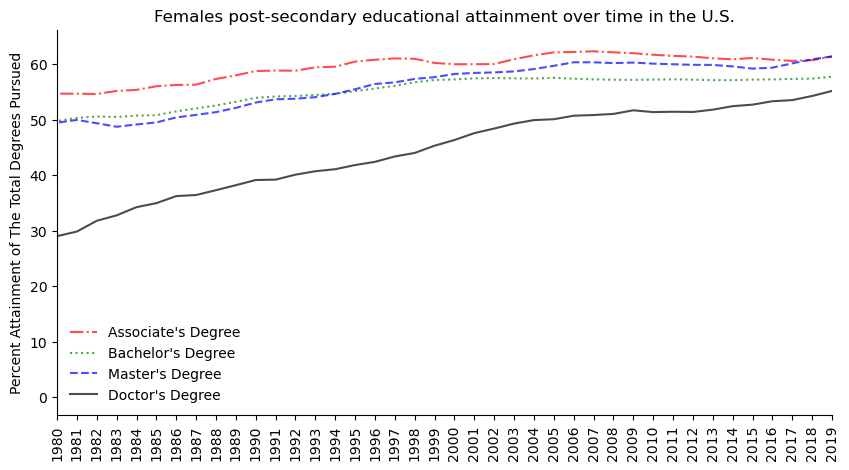

In [21]:
#Create a bar plot 
fig, ax = plt.subplots(figsize=(10,5)) 
ax.plot(degree_completion_by_sex_drop_3.index, degree_completion_by_sex_drop_3[("Associate", "Percent female")],        
        color='red',  
         alpha = 0.7,
        linestyle = '-.',
       label = "Associate's Degree"
       )  

ax.plot(degree_completion_by_sex_drop_3.index, degree_completion_by_sex_drop_3[("Bachelor", "Percent female")],       
        color='green',                   
        alpha = 0.7,
        linestyle = ':',
        label = "Bachelor's Degree"
       )  

ax.plot(degree_completion_by_sex_drop_3.index, degree_completion_by_sex_drop_3[("Master", "Percent female")],       
        color='blue',                   
        alpha = 0.7,
        linestyle = '--',
        label = "Master's Degree"
       )  

ax.plot(degree_completion_by_sex_drop_3.index,degree_completion_by_sex_drop_3 [("Doctor", "Percent female")],       
        color='black',                   
        alpha = 0.7,
        linestyle = '-',
        label = "Doctor's Degree"
       )  

ax.set_ylabel('Percent Attainment of The Total Degrees Pursued') 

ax.set_title('Females post-secondary educational attainment over time in the U.S.')

plt.xticks(rotation=90)

plt.xlim(('1980', '2019')) 

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 

ax.legend(frameon=False) 

plt.savefig('post_secondary_degree.pdf', bbox_inches='tight')

## Male Post-Secondary Education Over Time

In [22]:
degree_completion_by_sex_drop_3.head(2)

Associate                              Bachelor                 \
                 Total Males Females Percent female    Total  Males Females   
(Year, Year)                                                                  
1869               NaN   NaN     NaN            NaN     9371   7993    1378   
1879               NaN   NaN     NaN            NaN    12896  10411    2485   

                            Master                              Doctor        \
             Percent female  Total Males Females Percent female  Total Males   
(Year, Year)                                                                   
1869              14.704941      0     0       0            NaN      1     1   
1879              19.269541    879   868      11       1.251422     54    51   

                                     
             Females Percent female  
(Year, Year)                         
1869               0       0.000000  
1879               3       5.555556

In [23]:
#I need to create three new categories with male percentage completion for each degree 
degree_completion_by_sex_drop_3['male_perc_associate'] = degree_completion_by_sex_drop_3[("Associate", "Males")]*100/degree_completion_by_sex_drop_3[("Associate", "Total")]
degree_completion_by_sex_drop_3['male_perc_bachelor'] = degree_completion_by_sex_drop_3[("Bachelor", "Males")]*100/degree_completion_by_sex_drop_3[("Bachelor", "Total")]
degree_completion_by_sex_drop_3['male_perc_master'] = degree_completion_by_sex_drop_3[("Master", "Males")]*100/degree_completion_by_sex_drop_3[("Master", "Total")]
degree_completion_by_sex_drop_3['male_perc_doctor'] = degree_completion_by_sex_drop_3[("Doctor", "Males")]*100/degree_completion_by_sex_drop_3[("Doctor", "Total")]
degree_completion_by_sex_drop_3.head(3)
degree_completion_by_sex_drop_3.tail(3)


Associate                                    Bachelor          \
                  Total     Males   Females Percent female    Total   Males   
(Year, Year)                                                                  
2018          1036640.0  407219.0  629443.0      60.718248  2013086  857607   
2019          1019038.0  393383.0  625655.0      61.396631  2038682  861384   
2020-21       1036431.0  383029.0  653402.0      63.043464  2066445  860764   

                                      Master                                 \
              Females Percent female   Total   Males Females Percent female   
(Year, Year)                                                                  
2018          1155479      57.396562  833792  326201  507591      60.875177   
2019          1177298      57.747996  843531  325711  517820      61.387193   
2020-21       1205681      58.345661  866894  330700  536194      61.852314   

              Doctor                               male_perc_associate  \
               Total  Males Females Percent female                       
(Year, Year)                                                             
2018          187577  85771  101806      54.273117           39.282586   
2019          190133  85220  104913      55.178743           38.603369   
2020-21       194059  85367  108692      56.009770           36.956536   

             male_perc_bachelor male_perc_master male_perc_doctor  
                                                                   
(Year, Year)                                                       
2018                  42.601608        39.122587        45.725755  
2019                  42.252004        38.612807        44.821257  
2020-21               41.654339        38.147686        43.990230

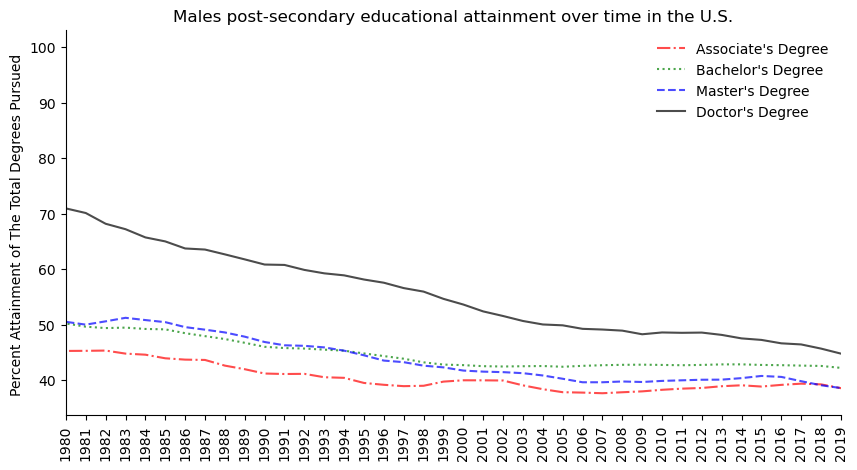

In [24]:
#create a graph for male degree completion 
#Create a bar plot 
fig, ax = plt.subplots(figsize=(10,5)) 
ax.plot(degree_completion_by_sex_drop_3.index, degree_completion_by_sex_drop_3[("male_perc_associate")],        
        color='red',  
         alpha = 0.7,
        linestyle = '-.',
       label = "Associate's Degree"
       )  

ax.plot(degree_completion_by_sex_drop_3.index, degree_completion_by_sex_drop_3[("male_perc_bachelor")],       
        color='green',                   
        alpha = 0.7,
        linestyle = ':',
        label = "Bachelor's Degree"
       )  

ax.plot(degree_completion_by_sex_drop_3.index, degree_completion_by_sex_drop_3[("male_perc_master")],       
        color='blue',                   
        alpha = 0.7,
        linestyle = '--',
        label = "Master's Degree"
       )  

ax.plot(degree_completion_by_sex_drop_3.index,degree_completion_by_sex_drop_3 [("male_perc_doctor")],       
        color='black',                   
        alpha = 0.7,
        linestyle = '-',
        label = "Doctor's Degree"
       )  

ax.set_ylabel('Percent Attainment of The Total Degrees Pursued ') 

ax.set_title('Males post-secondary educational attainment over time in the U.S.')

plt.xticks(rotation=90)

plt.xlim(('1980', '2019')) 

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 

ax.legend(frameon=False) 

#plt.savefig('post_secondary_degree.pdf', bbox_inches='tight')

## Female Earnings as a Percentage of Men's for Full Time and Salary Workers 

In [25]:
female_wages= pd.read_excel('female_wage.xlsx', na_values='-').set_index("Year") 
female_wages.head(2)

,Total,White,Black or African American,Asian,Hispanic or Latino
Year,,,,,
1979,0.623,0.617,0.744,NaN,0.717
1980,64.200,63.400,75.800,NaN,73.500


In [26]:
female_wages.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 1979 to 2016
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Total                      38 non-null     float64
 1   White                      38 non-null     float64
 2   Black or African American  38 non-null     float64
 3   Asian                      17 non-null     float64
 4   Hispanic or Latino         38 non-null     float64
dtypes: float64(5)
memory usage: 1.8 KB


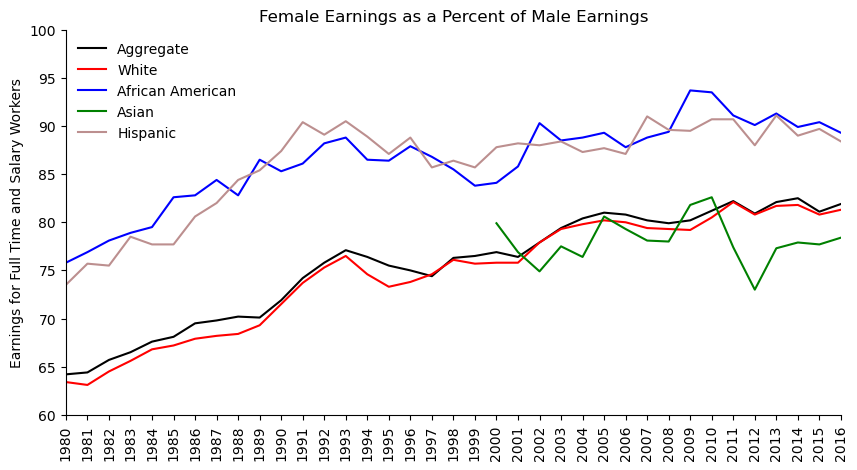

In [27]:
fig, ax = plt.subplots(figsize=(10,5)) 

ax.plot(female_wages.index, female_wages['Total'], color = 'black', label = 'Aggregate', alpha = 1)
ax.plot(female_wages.index, female_wages['White'], color = 'red', label = 'White', alpha = 1)
ax.plot(female_wages.index, female_wages['Black or African American'], color = 'blue', label = 'African American', alpha = 1)
ax.plot(female_wages.index, female_wages['Asian'], color = 'green', label = 'Asian', alpha = 1)
ax.plot(female_wages.index, female_wages['Hispanic or Latino'], color = 'rosybrown', label = 'Hispanic', alpha = 1)

ax.set_ylabel('Earnings for Full Time and Salary Workers') 

ax.set_title("Female Earnings as a Percent of Male Earnings")

plt.xticks(rotation=90)
ax.set_xticks([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])
plt.xlim((1980, 2016)) 
plt.ylim((60, 100)) 

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 

ax.legend(frameon=False) 


#plt.savefig('post_secondary_degree.pdf', bbox_inches='tight')

In [28]:
######### End: Sequoia's work

In [29]:
########## Begin: Luci's work

In [30]:
# Installing Needed Packages

import csv
import pandas as pd
import matplotlib.pyplot as plt 
import math

In [31]:
# Cleaning the Data :)

MaternalFile = open('LMF_1_2_Maternal_Employment_Num.csv')
MaternalEmpNum = pd.read_csv(MaternalFile, skiprows=2, na_values = '-')

#Looking for U.S. data only
startIndex = 0
endIndex = 0
for index, row in MaternalEmpNum.iterrows():
    rows = row.tolist()
    if rows[0] == 'United States' :
        startIndex = index
        endIndex = index + 5
        break

#Convert pandas dataframe to list
selectedRows = MaternalEmpNum.iloc[startIndex : endIndex]
selectedRowsLists = selectedRows.values.tolist()

#Remove dots and unknown information (nans) from data
for i in range(len(selectedRowsLists)) :
    rowLength = len(selectedRowsLists[i])
    j = 0
    while j < rowLength:
        if type(selectedRowsLists[i][j]) == float and math.isnan(selectedRowsLists[i][j]):
            del selectedRowsLists[i][j]
            j = j-1
            rowLength = rowLength - 1
        if selectedRowsLists[i][j] == '..':
            del selectedRowsLists[i][j]
            j = j-1
            rowLength = rowLength - 1
        j = j + 1

# Remove 'United States' and '1'
del selectedRowsLists[0][0]
del selectedRowsLists[0][0]

startingYear = 2003

print(selectedRowsLists)

[['No children aged 0-17', '75.9', '76.2', '76.2', '76.4', '76.2', '75.8', '73.4', '73.1', '72.5', '72.4', '72.8', '73.4', '74.1', '74.4', '75.0', '76.1', '76.8', '72.5', '73.7'], ['At least one child aged 0-17', '68.6', '68.4', '68.6', '69.1', '69.6', '69.3', '67.2', '66.2', '65.8', '66.5', '66.5', '67.1', '67.4', '68.4', '69.2', '70.2', '71.1', '67.0', '68.0'], ['One child aged 0-17', '74.5', '73.9', '73.6', '74.5', '75.3', '74.7', '72.8', '71.5', '71.1', '72.0', '71.5', '72.2', '72.4', '73.5', '73.6', '74.6', '75.3', '71.5', '73.3'], ['Two children aged 0-17', '68.9', '68.8', '69.1', '69.6', '70.3', '70.0', '68.0', '67.4', '66.4', '67.0', '67.2', '67.7', '68.2', '69.5', '70.6', '71.4', '72.3', '68.1', '68.8'], ['Three or more children aged 0-17', '56.8', '57.5', '58.3', '58.2', '57.7', '58.4', '55.4', '54.4', '54.7', '55.1', '55.6', '56.3', '56.8', '57.1', '58.5', '59.9', '61.0', '56.3', '56.6']]


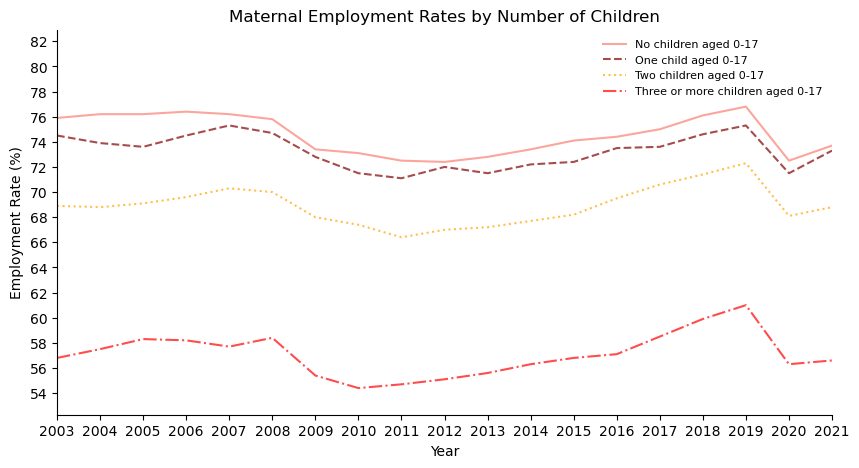

In [32]:
# Create Timeseries Plot

# Create plot and plot size
fig, ax = plt.subplots(figsize=(10,5))

# Plotting and Styling Data 
years = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
for row in selectedRowsLists:
    legend_title = row[0]
    if legend_title == 'At least one child aged 0-17' :
        continue
    line_data = [float(x) for x in row[1:]]
    if legend_title == 'No children aged 0-17' :
        ax.plot(years, line_data, 
                color='salmon',
                alpha = 0.7,
                linestyle = '-',
                label=legend_title)
    if legend_title == 'One child aged 0-17' :
        ax.plot(years, line_data, 
                color='maroon',
                alpha = 0.7,
                linestyle = '--',
                label=legend_title)
    if legend_title == 'Two children aged 0-17' :
        ax.plot(years, line_data, 
                color='orange',
                alpha = 0.7,
                linestyle = ':',
                label=legend_title)
    if legend_title == 'Three or more children aged 0-17' :
        ax.plot(years, line_data, 
                color='red',
                alpha = 0.7,
                linestyle = 'dashdot',
                label=legend_title)

# Organize X Axis
ax.set_title('Maternal Employment Rates by Number of Children')
ax.set_xlabel("Year")
ax.set_xticks([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
plt.xlim((2003, 2021))

# Organize Y Axis
ax.set_ylabel("Employment Rate (%)")
y_min, y_max = ax.get_ylim()
ax.set_ylim(y_min - 1, y_max + 5)
ax.yaxis.set_major_locator(plt.MaxNLocator(18))

#Reomving Unnecessary Lines for Graph area and Legend and Changed legend Size
ax.legend(frameon = False, prop = {"size" : 8})
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 

#Save plot
plt.savefig('maternal_emp_num.pdf')


plt.show()

In [33]:
####### End: Luci's work

In [34]:
##### Begin: Ruijing's work 

In [35]:
import pandas as pd
df = pd.read_csv("employment status.csv", header = 3)
df.head(10)

,Year,Civilian\nnoninstitu-\ntional\npopulation,Civilian labor force,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Not\nin\nlabor\nforce
0,NaN,NaN,Total,Percent of\npopulation,Employed,NaN,NaN,NaN,Unemployed,NaN,NaN
1,NaN,NaN,NaN,NaN,Total,Percent of\npopulation,Agri-\nculture,Nonagri-\ncultural\nindustries,Number,Percent of\nlabor force,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Men,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990,"90,377","69,011",76.4,"65,104",72.0,"2,546","62,559","3,906",5.7,"21,367"
5,1991,"91,278","69,168",75.8,"64,223",70.4,"2,589","61,634","4,946",7.2,"22,110"
6,1992,"92,270","69,964",75.8,"64,440",69.8,"2,575","61,866","5,523",7.9,"22,306"
7,1993,"93,332","70,404",75.4,"65,349",70.0,"2,478","62,871","5,055",7.2,"22,927"
8,1994,"94,355","70,817",75.1,"66,450",70.4,"2,554","63,896","4,367",6.2,"23,538"
9,1995,"95,178","71,360",75.0,"67,377",70.8,"2,559","64,818","3,983",5.6,"23,818"


In [36]:
cols = ['Year','Civilian\nnoninstitu-\ntional\npopulation','Unnamed: 4','Unnamed: 5']       
old_names = df[cols]
new_names = ['Year','noninstitutional polulation', 'total male employment', 'employment percentage',]

names = dict(zip(old_names, new_names))
df2 = old_names.rename(columns=names)      #renaming selected columns
df2.head()

,Year,noninstitutional polulation,total male employment,employment percentage
0,NaN,NaN,Employed,NaN
1,NaN,NaN,Total,Percent of\npopulation
2,NaN,NaN,NaN,NaN
3,Men,NaN,NaN,NaN
4,1990,"90,377","65,104",72.0


In [37]:
male = df2.loc[4:37]
male = male.set_index('Year')
male.shape


(34, 3)

In [38]:
male.to_csv('male.csv')  #save cleaned male data to a csv file

In [39]:
female = df2.loc[40:73]
female = female.set_index('Year')
female.tail(5)
female.shape

(34, 3)

In [40]:
female.to_csv('female.csv')    #save cleaned female data to a csv file

In [41]:
import pandas as pd
import numpy as np              
import matplotlib.pyplot as plt  
import seaborn as sns


In [42]:
male = pd.read_csv("male.csv", index_col='Year')
male.rename(columns = {"employment percentage": "male employment percentage"}, inplace = True)
male.head()

,noninstitutional polulation,total male employment,male employment percentage
Year,,,
1990,"90,377","65,104",72.0
1991,"91,278","64,223",70.4
1992,"92,270","64,440",69.8
1993,"93,332","65,349",70.0
1994,"94,355","66,450",70.4


In [43]:
female = pd.read_csv("female.csv",index_col='Year')
female.rename(columns = {"total male employment": "total female employment", "employment percentage": "female employment percentage"}, inplace = True)
female.head()

,noninstitutional polulation,total female employment,female employment percentage
Year,,,
1990,"98,787","53,689",54.3
1991,"99,646","53,496",53.7
1992,"100,535","54,052",53.8
1993,"101,506","54,910",54.1
1994,"102,460","56,610",55.3


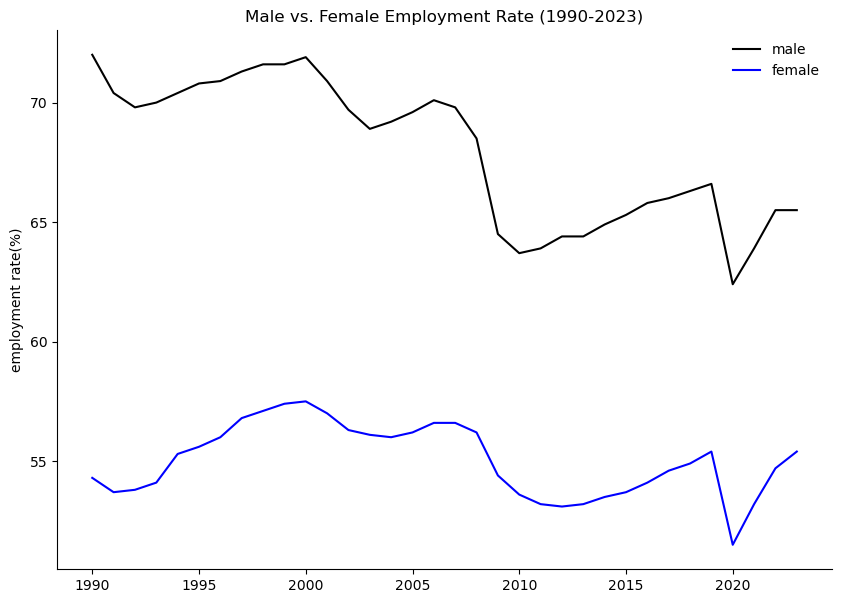

In [44]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(male.index, male['male employment percentage'], color = 'black', alpha = 1, label = 'male')
ax.plot(female.index, female['female employment percentage'], color = 'blue', alpha = 1, label = 'female')

ax.set_ylabel('employment rate(%)')
ax.set_title('Male vs. Female Employment Rate (1990-2023)')

sns.despine(ax=ax)
ax.legend(frameon=False)
plt.show()
fig = ax.get_figure()
fig.savefig("employment comparison.png")

In [45]:
########## End: Ruijing's work

In [46]:
##### Begin: Hajar's work

In [47]:
# Converting selectedRowsLists from a list to a dictionary for easier manipulation in creating dataframes later

selectedRowsLists[0]
selectedRowsLists[1][1:]

children = {}
for i in range(len(selectedRowsLists)):
    children[selectedRowsLists[i][0]]=selectedRowsLists[i][1:-2]
    
children

{'No children aged 0-17': ['75.9',
  '76.2',
  '76.2',
  '76.4',
  '76.2',
  '75.8',
  '73.4',
  '73.1',
  '72.5',
  '72.4',
  '72.8',
  '73.4',
  '74.1',
  '74.4',
  '75.0',
  '76.1',
  '76.8'],
 'At least one child aged 0-17': ['68.6',
  '68.4',
  '68.6',
  '69.1',
  '69.6',
  '69.3',
  '67.2',
  '66.2',
  '65.8',
  '66.5',
  '66.5',
  '67.1',
  '67.4',
  '68.4',
  '69.2',
  '70.2',
  '71.1'],
 'One child aged 0-17': ['74.5',
  '73.9',
  '73.6',
  '74.5',
  '75.3',
  '74.7',
  '72.8',
  '71.5',
  '71.1',
  '72.0',
  '71.5',
  '72.2',
  '72.4',
  '73.5',
  '73.6',
  '74.6',
  '75.3'],
 'Two children aged 0-17': ['68.9',
  '68.8',
  '69.1',
  '69.6',
  '70.3',
  '70.0',
  '68.0',
  '67.4',
  '66.4',
  '67.0',
  '67.2',
  '67.7',
  '68.2',
  '69.5',
  '70.6',
  '71.4',
  '72.3'],
 'Three or more children aged 0-17': ['56.8',
  '57.5',
  '58.3',
  '58.2',
  '57.7',
  '58.4',
  '55.4',
  '54.4',
  '54.7',
  '55.1',
  '55.6',
  '56.3',
  '56.8',
  '57.1',
  '58.5',
  '59.9',
  '61.0']}

In [48]:
#Creating a new DataFrame called children from the dictionary children
children = pd.DataFrame(children)

children.insert(0, "Year", list(range(2003, 2020, 1)), True) #citation for insert method: https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/

children.head()


#degrees.columns

,Year,No children aged 0-17,At least one child aged 0-17,One child aged 0-17,Two children aged 0-17,Three or more children aged 0-17
0,2003,75.9,68.6,74.5,68.9,56.8
1,2004,76.2,68.4,73.9,68.8,57.5
2,2005,76.2,68.6,73.6,69.1,58.3
3,2006,76.4,69.1,74.5,69.6,58.2
4,2007,76.2,69.6,75.3,70.3,57.7


In [49]:
#Creating a new dataset called degrees using data from years 2003 through 2019

degrees = degree_completion_by_sex_drop_3.loc["2003":"2020"]
degrees.reset_index(inplace = True)
degrees.head()

Year Associate                                    Bachelor                  \
   Year     Total     Males   Females Percent female    Total   Males Females   
0  2003  665945.0  260400.0  405545.0      60.897672  1399760  595568  804192   
1  2004  697086.0  267759.0  429327.0      61.588814  1439848  613183  826665   
2  2005  713315.0  270139.0  443176.0      62.129073  1485104  630502  854602   
3  2006  727616.0  275034.0  452582.0      62.200666  1524729  649816  874913   
4  2007  750166.0  282695.0  467471.0      62.315674  1563734  668184  895550   

                  Master  ...                         Doctor                 \
  Percent female   Total  ... Females Percent female   Total  Males Females   
0      57.452135  564606  ...  331436      58.702175  126325  64045   62280   
1      57.413352  580562  ...  343206      59.116167  134271  67231   67040   
2      57.544926  599862  ...  358161      59.707233  138056  68912   69144   
3      57.381541  610703  ...  368490      60.338659  144694  71311   73383   
4      57.269970  630844  ...  380641      60.338372  149190  73340   75850   

                 male_perc_associate male_perc_bachelor male_perc_master  \
  Percent female                                                           
0      49.301405           39.102328          42.547865        41.297825   
1      49.928875           38.411186          42.586648        40.883833   
2      50.084024           37.870927          42.455074        40.292767   
3      50.715994           37.799334          42.618459        39.661341   
4      50.841209           37.684326          42.730030        39.661628   

  male_perc_doctor  
                    
0        50.698595  
1        50.071125  
2        49.915976  
3        49.284006  
4        49.158791  

[5 rows x 21 columns]

In [50]:
#Creating a new DataFrame degrees_no_level to remove levels and renaming column names to assist with performing regression with 
#acceptable syntax
degrees_no_level = pd.DataFrame()

col1 = degrees["Year"]
col2 = degrees["Associate"].rename(columns={"Total": "Total_A", "Males": "Males_A", "Females": "Females_A", "Percent female": "Percent_female_A"})
col3 = degrees["Bachelor"].rename(columns={"Total": "Total_B", "Males": "Males_B", "Females": "Females_B", "Percent female": "Percent_female_B"})
col4 = degrees["Master"].rename(columns={"Total": "Total_M", "Males": "Males_M", "Females": "Females_M", "Percent female": "Percent_female_M"})
col5 = degrees["Doctor"].rename(columns={"Total": "Total_D", "Males": "Males_D", "Females": "Females_D", "Percent female": "Percent_female_D"})


col_a = [col2, col3, col4, col5]
degrees_no_level["Year"] = col1

for col in col_a:
    degrees_no_level = degrees_no_level.join(col, how = 'inner')

degrees_no_level["Year"] = degrees_no_level["Year"].astype(int)

degrees_no_level.head()

,Year,Total_A,Males_A,Females_A,Percent_female_A,Total_B,Males_B,Females_B,Percent_female_B,Total_M,Males_M,Females_M,Percent_female_M,Total_D,Males_D,Females_D,Percent_female_D
0,2003,665945.0,260400.0,405545.0,60.897672,1399760,595568,804192,57.452135,564606,233170,331436,58.702175,126325,64045,62280,49.301405
1,2004,697086.0,267759.0,429327.0,61.588814,1439848,613183,826665,57.413352,580562,237356,343206,59.116167,134271,67231,67040,49.928875
2,2005,713315.0,270139.0,443176.0,62.129073,1485104,630502,854602,57.544926,599862,241701,358161,59.707233,138056,68912,69144,50.084024
3,2006,727616.0,275034.0,452582.0,62.200666,1524729,649816,874913,57.381541,610703,242213,368490,60.338659,144694,71311,73383,50.715994
4,2007,750166.0,282695.0,467471.0,62.315674,1563734,668184,895550,57.269970,630844,250203,380641,60.338372,149190,73340,75850,50.841209


In [51]:
#Creating a new DataFrame called female_and_male_employment by merging the male and female employment rate data spanning the years 2003 to 2019

male_to2019 = male.loc[:2019]

female_to2019 = female.loc[:2019]


female_and_male_employment = female_to2019.merge(male_to2019, on = 'Year', how = 'inner')


female_and_male_employment.reset_index(inplace=True)

In [52]:
# Editing female_and_male_employment by converting Year col to be of type int
female_and_male_employment["Year"] = female_and_male_employment["Year"].astype(int)
female_and_male_employment.head()

,Year,noninstitutional polulation_x,total female employment,female employment percentage,noninstitutional polulation_y,total male employment,male employment percentage
0,1990,"98,787","53,689",54.3,"90,377","65,104",72.0
1,1991,"99,646","53,496",53.7,"91,278","64,223",70.4
2,1992,"100,535","54,052",53.8,"92,270","64,440",69.8
3,1993,"101,506","54,910",54.1,"93,332","65,349",70.0
4,1994,"102,460","56,610",55.3,"94,355","66,450",70.4


In [53]:
#The Next Two Cells: resetting the index of female wages data and using data from 2003 through 2016 (the end of the dataset)
female_wages.reset_index(inplace = True)


In [54]:
female_wages["Year"] = female_wages["Year"].astype(int)
female_wages.head()



,Year,Total,White,Black or African American,Asian,Hispanic or Latino
0,1979,0.623,0.617,0.744,NaN,0.717
1,1980,64.200,63.400,75.800,NaN,73.500
2,1981,64.400,63.100,76.900,NaN,75.700
3,1982,65.700,64.500,78.100,NaN,75.500
4,1983,66.500,65.600,78.900,NaN,78.500


In [55]:
#Note children and female_wages are not merged into temp2!

In [56]:
#Merging together female_and_male_employment, and degrees_no_level
#temp1 = female_and_male_employment.merge(female_wages, on = "Year", how = "inner")
#temp1
female_and_male_employment.drop(columns=["noninstitutional polulation_x", "noninstitutional polulation_y", "total female employment", "total male employment"], inplace = True)
temp2 = female_and_male_employment.merge(degrees_no_level, on = "Year", how = "inner")
temp2.rename(columns={"female employment percentage" : "female_employment_percentage", "Total":"Aggregate_Female_Percent_Earnings",
                     "Total_A": "Total_Assoc"}, inplace = True)

temp2.head()

#Racial groups have wages as a percentage of male earnings


,Year,female_employment_percentage,male employment percentage,Total_Assoc,Males_A,Females_A,Percent_female_A,Total_B,Males_B,Females_B,Percent_female_B,Total_M,Males_M,Females_M,Percent_female_M,Total_D,Males_D,Females_D,Percent_female_D
0,2003,56.1,68.9,665945.0,260400.0,405545.0,60.897672,1399760,595568,804192,57.452135,564606,233170,331436,58.702175,126325,64045,62280,49.301405
1,2004,56.0,69.2,697086.0,267759.0,429327.0,61.588814,1439848,613183,826665,57.413352,580562,237356,343206,59.116167,134271,67231,67040,49.928875
2,2005,56.2,69.6,713315.0,270139.0,443176.0,62.129073,1485104,630502,854602,57.544926,599862,241701,358161,59.707233,138056,68912,69144,50.084024
3,2006,56.6,70.1,727616.0,275034.0,452582.0,62.200666,1524729,649816,874913,57.381541,610703,242213,368490,60.338659,144694,71311,73383,50.715994
4,2007,56.6,69.8,750166.0,282695.0,467471.0,62.315674,1563734,668184,895550,57.269970,630844,250203,380641,60.338372,149190,73340,75850,50.841209


In [57]:
#temp2["Percent_female_B"].describe()

In [58]:
#temp2["female_employment_percentage"].describe()

In [59]:
#Note that the next 7 cells resturcture children by making it long, adding a dummy variable Has_children to run in regression
#Also, note that the next 7 cells 

In [94]:
children.head()

,Year,No children aged 0-17,At least one child aged 0-17,One child aged 0-17,Two children aged 0-17,Three or more children aged 0-17
0,2003,75.9,68.6,74.5,68.9,56.8
1,2004,76.2,68.4,73.9,68.8,57.5
2,2005,76.2,68.6,73.6,69.1,58.3
3,2006,76.4,69.1,74.5,69.6,58.2
4,2007,76.2,69.6,75.3,70.3,57.7


In [95]:
children_new = children.drop(columns = ["One child aged 0-17", "Two children aged 0-17", "Three or more children aged 0-17"])
children_new.rename(columns = {"No children aged 0-17" : "0_children", "At least one child aged 0-17": "1_child"}, inplace = True)

children_new_1 = pd.melt(children_new, id_vars=['Year'], value_vars=['0_children', '1_child'])

children_new_1.head()

,Year,variable,value
0,2003,0_children,75.9
1,2004,0_children,76.2
2,2005,0_children,76.2
3,2006,0_children,76.4
4,2007,0_children,76.2


In [96]:
children_new_1.rename(columns = {"value" : "female_employment_rate"}, inplace = True)
children_new_2 = children_new_1.join(pd.get_dummies(children_new_1["variable"])).drop(columns = ["variable", "0_children"])
children_new_2.head()


,Year,female_employment_rate,1_child
0,2003,75.9,False
1,2004,76.2,False
2,2005,76.2,False
3,2006,76.4,False
4,2007,76.2,False


In [97]:
children_new_2["1_child"] = children_new_2["1_child"].astype(int).astype(float)      
children_new_2.rename(columns = {"1_child": "Has_children"}, inplace = True)          


In [275]:
dummy = pd.get_dummies(children_new_2['Has_children'])
dummy.dtypes

0.0    bool
1.0    bool
dtype: object

In [302]:
children_new_2.head()
#col = children_new_2.loc [17: ] 
children_new_4 = children_new_2.loc[ :17]
children_new_4['No_children'] = 0
children_new_4['Has_children'] = 1
children_new_4

C:\Users\local_rhong22\Temp\2\ipykernel_48376\1933669227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children_new_4['No_children'] = 0
C:\Users\local_rhong22\Temp\2\ipykernel_48376\1933669227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children_new_4['Has_children'] = 1


,Year,female_employment_rate,Has_children,No_children
0,2003,75.9,1,0
1,2004,76.2,1,0
2,2005,76.2,1,0
3,2006,76.4,1,0
4,2007,76.2,1,0
5,2008,75.8,1,0
6,2009,73.4,1,0
7,2010,73.1,1,0
8,2011,72.5,1,0
9,2012,72.4,1,0


In [309]:

#Merging together children_new_3 DataFrame and a single column Percent_female_B from temp2 DataFrame to perform regression later
children_new_5 = children_new_4.merge(temp2[["Year", "Percent_female_B", "Percent_female_M", "Percent_female_D"]], on = "Year", how = "inner")
children_new_5["female_employment_rate"] = children_new_5["female_employment_rate"].astype(float)


In [308]:
"""
children_new_5.head()
#children_new_5.set_index("Has_children", inplace = True)
"""

,Year,female_employment_rate,No_children,Percent_female_B,Percent_female_M,Percent_female_D
Has_children,,,,,,
1,2003,75.9,0,57.452135,58.702175,49.301405
1,2004,76.2,0,57.413352,59.116167,49.928875
1,2005,76.2,0,57.544926,59.707233,50.084024
1,2006,76.4,0,57.381541,60.338659,50.715994
1,2007,76.2,0,57.269970,60.338372,50.841209


In [312]:
children_new_5.head()

,Year,female_employment_rate,Has_children,No_children,Percent_female_B,Percent_female_M,Percent_female_D
0,2003,75.9,1,0,57.452135,58.702175,49.301405
1,2004,76.2,1,0,57.413352,59.116167,49.928875
2,2005,76.2,1,0,57.544926,59.707233,50.084024
3,2006,76.4,1,0,57.381541,60.338659,50.715994
4,2007,76.2,1,0,57.269970,60.338372,50.841209


In [106]:
#Running Linear Regression Models

In [313]:
children_new_5.columns

Index(['Year', 'female_employment_rate', 'Has_children', 'No_children',
       'Percent_female_B', 'Percent_female_M', 'Percent_female_D'],
      dtype='object')

In [326]:
# model 1
res = smf.ols('female_employment_rate ~ Percent_female_B', data= children_new_5).fit()        #interaction term : The coefficient of an interaction term tells you how much the effect of one variable changes when the other variable increases by one unit
print(res.summary())

                              OLS Regression Results                              
Dep. Variable:     female_employment_rate   R-squared:                       0.534
Model:                                OLS   Adj. R-squared:                  0.502
Method:                     Least Squares   F-statistic:                     17.15
Date:                    Wed, 01 May 2024   Prob (F-statistic):           0.000869
Time:                            09:35:16   Log-Likelihood:                -24.664
No. Observations:                      17   AIC:                             53.33
Df Residuals:                          15   BIC:                             54.99
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------


C:\ProgramData\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Intercept          -323.479459
Percent_female_B      6.948209
dtype: float64
-323.4794588453333
6.948208742093044


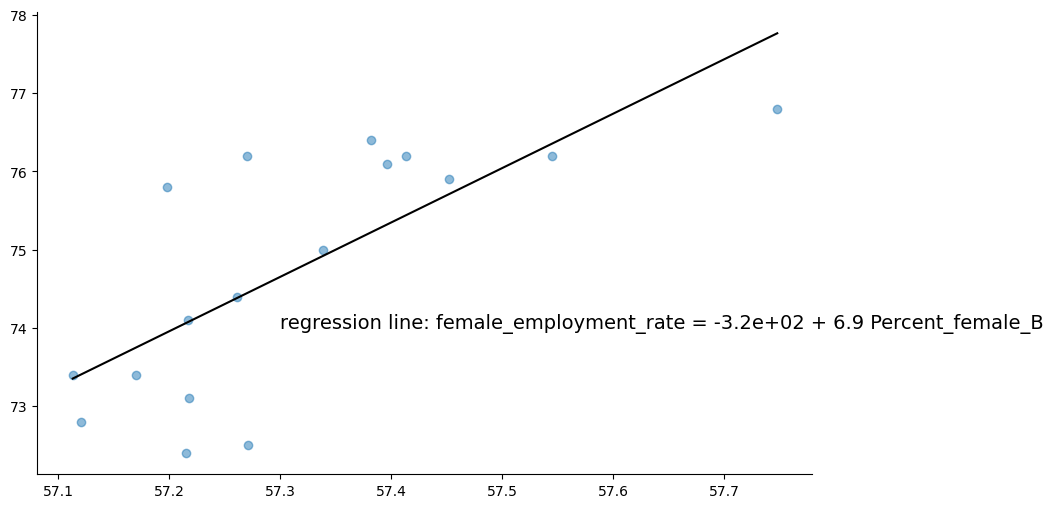

In [323]:
#re plot 1
prac_results = smf.ols('female_employment_rate ~ Percent_female_B', data=children_new_5).fit()
p = prac_results.params                                # params from the model fit
print(p)

x = [children_new_5['Percent_female_B'].min(), children_new_5['Percent_female_B'].max()]

y = [p.Intercept + p.Percent_female_B*i for i in x]  



fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
ax.scatter(children_new_5['Percent_female_B'], children_new_5['female_employment_rate'], marker='o', alpha = 0.5 )

# Plot the regression line.
ax.plot(x,y, color='black')

ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)

text = 'regression line: female_employment_rate = {0:.2} + {1:.2} Percent_female_B'.format(p.Intercept, p.Percent_female_B)
ax.text(57.3, 74, text, fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

print(p.Intercept)
print(p.Percent_female_B)

In [240]:
#children_new_3.head()

,Year,female_employment_rate,Has_children,Percent_female_B,Percent_female_M,Percent_female_D
0,2003,75.9,0.0,57.452135,58.702175,49.301405
1,2003,68.6,1.0,57.452135,58.702175,49.301405
2,2004,76.2,0.0,57.413352,59.116167,49.928875
3,2004,68.4,1.0,57.413352,59.116167,49.928875
4,2005,76.2,0.0,57.544926,59.707233,50.084024


In [329]:
# model 2: Running a regression female_employment_rate 
res_model = smf.ols('female_employment_rate ~  Percent_female_B + Has_children', data= children_new_5).fit()
print(res_model.summary())


                              OLS Regression Results                              
Dep. Variable:     female_employment_rate   R-squared:                       0.534
Model:                                OLS   Adj. R-squared:                  0.502
Method:                     Least Squares   F-statistic:                     17.15
Date:                    Wed, 01 May 2024   Prob (F-statistic):           0.000869
Time:                            09:47:56   Log-Likelihood:                -24.664
No. Observations:                      17   AIC:                             53.33
Df Residuals:                          15   BIC:                             54.99
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------


C:\ProgramData\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Intercept           44.597364
Percent_female_M     0.502939
dtype: float64
44.597364139509864
0.5029394021458184


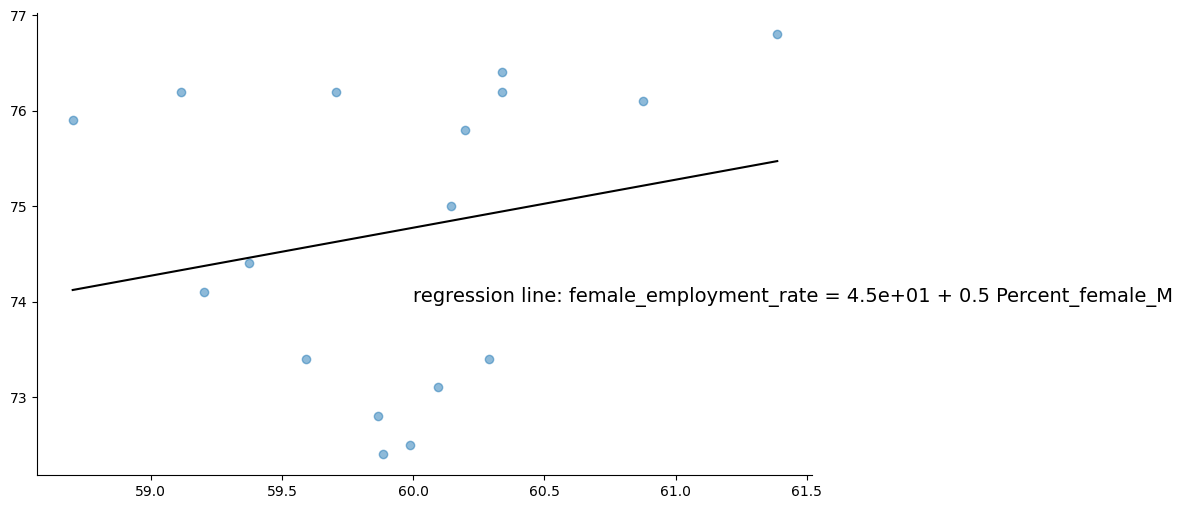

In [322]:
#regression plot 2
prac_results = smf.ols('female_employment_rate ~ Percent_female_M', data=children_new_5).fit()
p = prac_results.params                                # params from the model fit
print(p)


x = [children_new_5['Percent_female_M'].min(), children_new_5['Percent_female_M'].max()]

y = [p.Intercept + p.Percent_female_M*i for i in x]   


fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
ax.scatter(children_new_5['Percent_female_M'], children_new_5['female_employment_rate'], marker='o', alpha = 0.5 )

# Plot the regression line.
ax.plot(x,y, color='black')

ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)

text = 'regression line: female_employment_rate = {0:.2} + {1:.2} Percent_female_M'.format(p.Intercept, p.Percent_female_M)
ax.text(60, 74, text, fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

print(p.Intercept)
print(p.Percent_female_M)

In [328]:
res_model = smf.ols('female_employment_rate ~ Percent_female_B + Has_children + Percent_female_B * Has_children' , data= children_new_5).fit()
print(res_model.summary())

                              OLS Regression Results                              
Dep. Variable:     female_employment_rate   R-squared:                       0.534
Model:                                OLS   Adj. R-squared:                  0.502
Method:                     Least Squares   F-statistic:                     17.15
Date:                    Wed, 01 May 2024   Prob (F-statistic):           0.000869
Time:                            09:36:16   Log-Likelihood:                -24.664
No. Observations:                      17   AIC:                             53.33
Df Residuals:                          15   BIC:                             54.99
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

C:\ProgramData\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# interpretation for interation term :   females with a bachelor's degree and have children are likely to improve employment rate than females with a bachelor's degree but have no children because of life stability and that people are generally more successful later in life

In [ ]:
# Questions for Minnie....
# 1. okay to leave wages out for now?  Yes
# 2. model 3: if variables that have a p > 0.05 (not statistically significant), then there are factors beyond edu level that will have a greater impact of female employment rate?
    # interpretation for model 3 (see above)
# 3. complexity of our regressional models (too simple?)  marriage data?
# 4. should we keep our residual plots? If so, how to interpret?           (Drop both residual plots, regression model is good enough )
# 5: how to interpret the negative slope for Percent_female_M               (drop this variable)      